In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3759,ham,We'll join the &lt;#&gt; bus,NaN,NaN,NaN
836,spam,Do you want 750 anytime any network mins 150 t...,NaN,NaN,NaN
2252,ham,Den wat will e schedule b lk on sun?,NaN,NaN,NaN
3691,ham,No i am not having not any movies in my laptop,NaN,NaN,NaN
2883,ham,Cbe is really good nowadays:)lot of shop and s...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [8]:
df.sample(5)

,v1,v2
4461,ham,"Sorry I flaked last night, shit's seriously go..."
446,ham,"Well done, blimey, exercise, yeah, i kinda rem..."
4086,spam,PRIVATE! Your 2003 Account Statement for 07973...
1838,spam,Hack Chat. Get backdoor entry into 121 chat ro...
9,spam,Had your mobile 11 months or more? U R entitle...


In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
4291,ham,G.W.R
5355,ham,Living is very simple.. Loving is also simple....
1960,spam,Guess what! Somebody you know secretly fancies...
266,ham,"Not sure yet, still trying to get a hold of him"
2339,ham,Cheers for the message Zogtorius. I��ve been s...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])
# 0 -> ham, 1 -> spam

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# duplicate values
df.duplicated().sum()

409

In [16]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5163, 2)

## 2. EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

0    4516
1     647
Name: target, dtype: int64

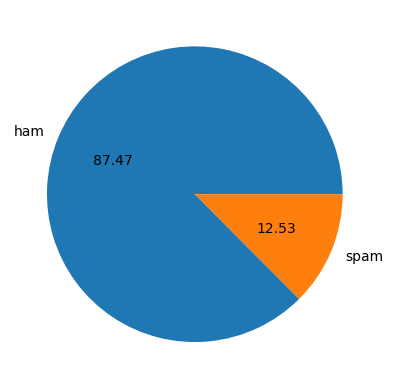

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%.2f")
plt.show()

#### Data is imbalaced

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/diyajain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
# num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5163.000000,5163.000000,5163.000000
mean,78.811156,18.444122,1.963974
std,58.153491,13.327940,1.448008
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.428919,17.123782,1.820195
std,56.356310,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,647.000000,647.000000,647.000000
mean,137.318393,27.659969,2.967543
std,30.096861,7.038065,1.490069
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

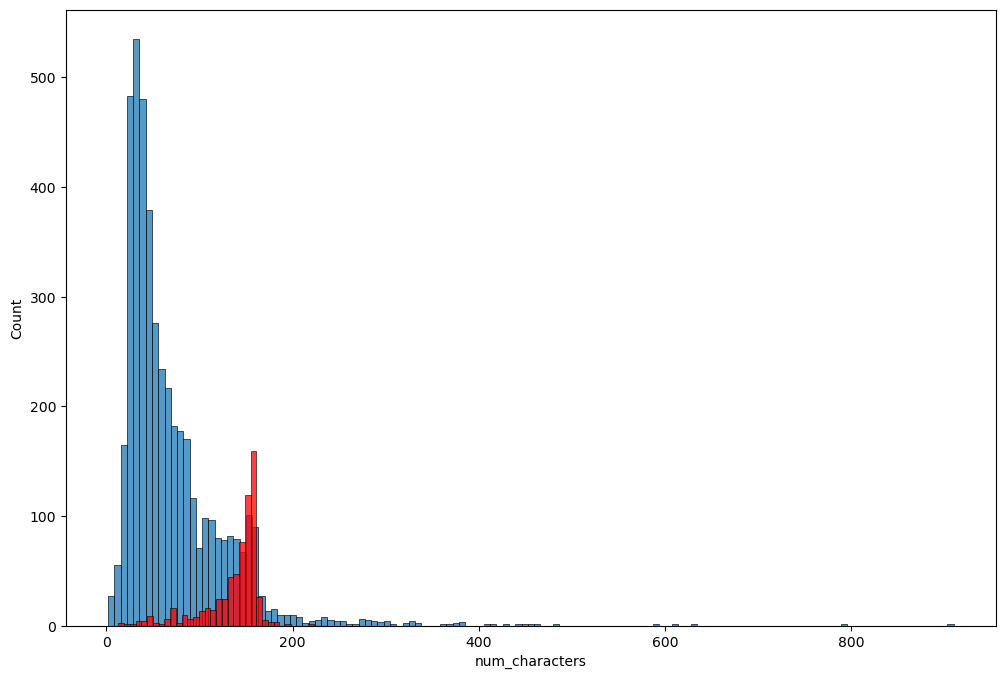

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

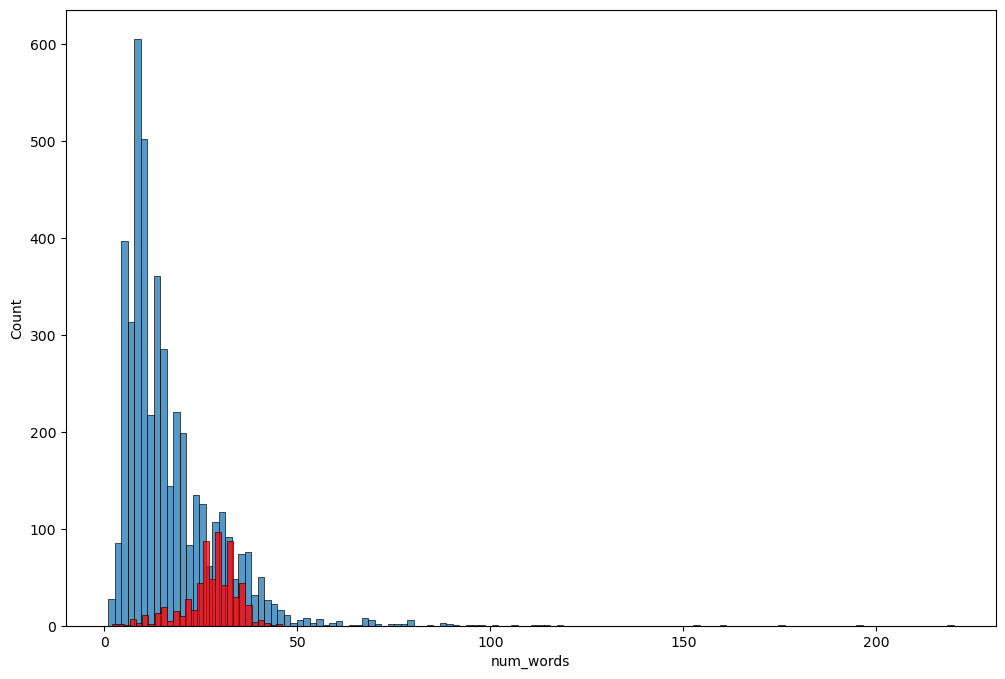

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

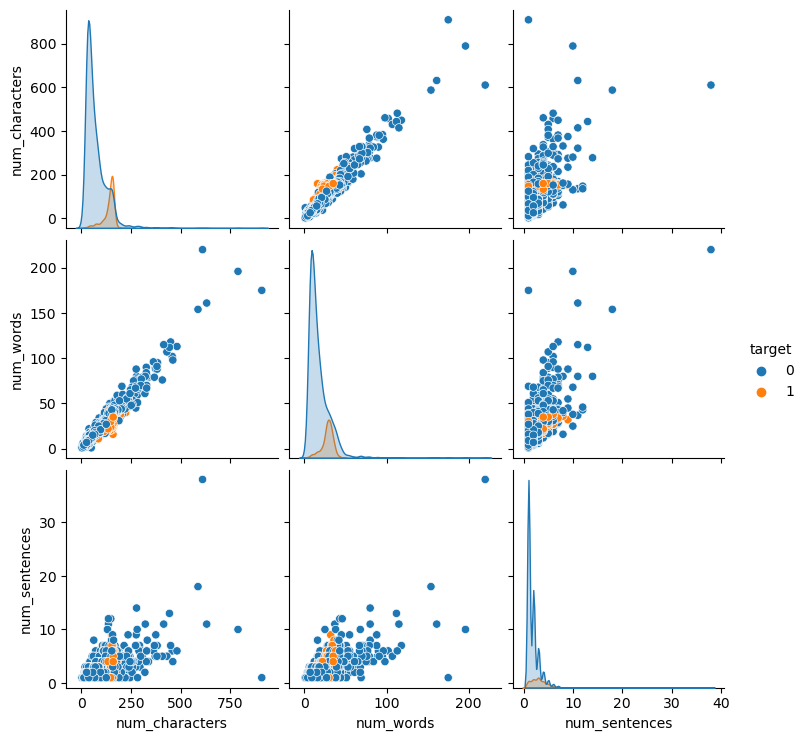

In [36]:
sns.pairplot(df,hue='target')

/var/folders/v6/p_p_1pts4n1_ywt2zcpt7q_00000gn/T/ipykernel_9563/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

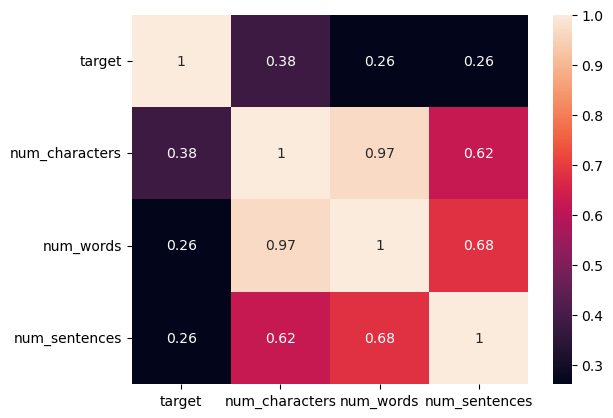

In [37]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming/Lemmatization

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/diyajain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc =  WordCloud(width=500, height=500, min_font_size = 10, background_color = 'white')

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

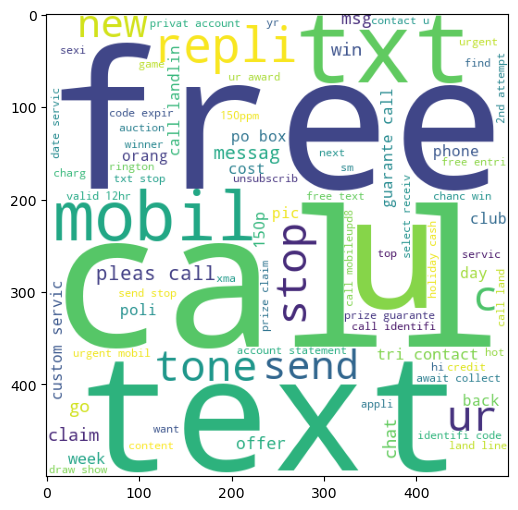

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

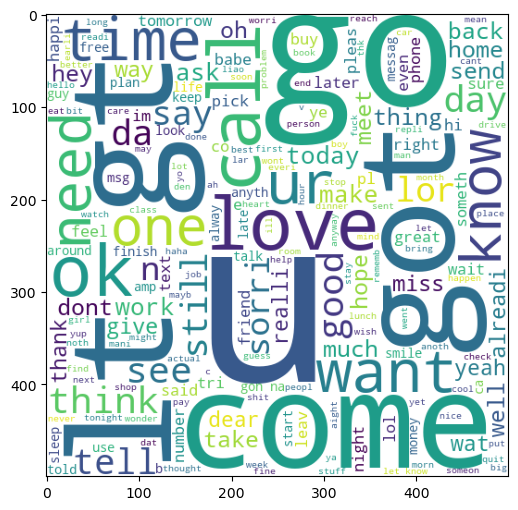

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

9861

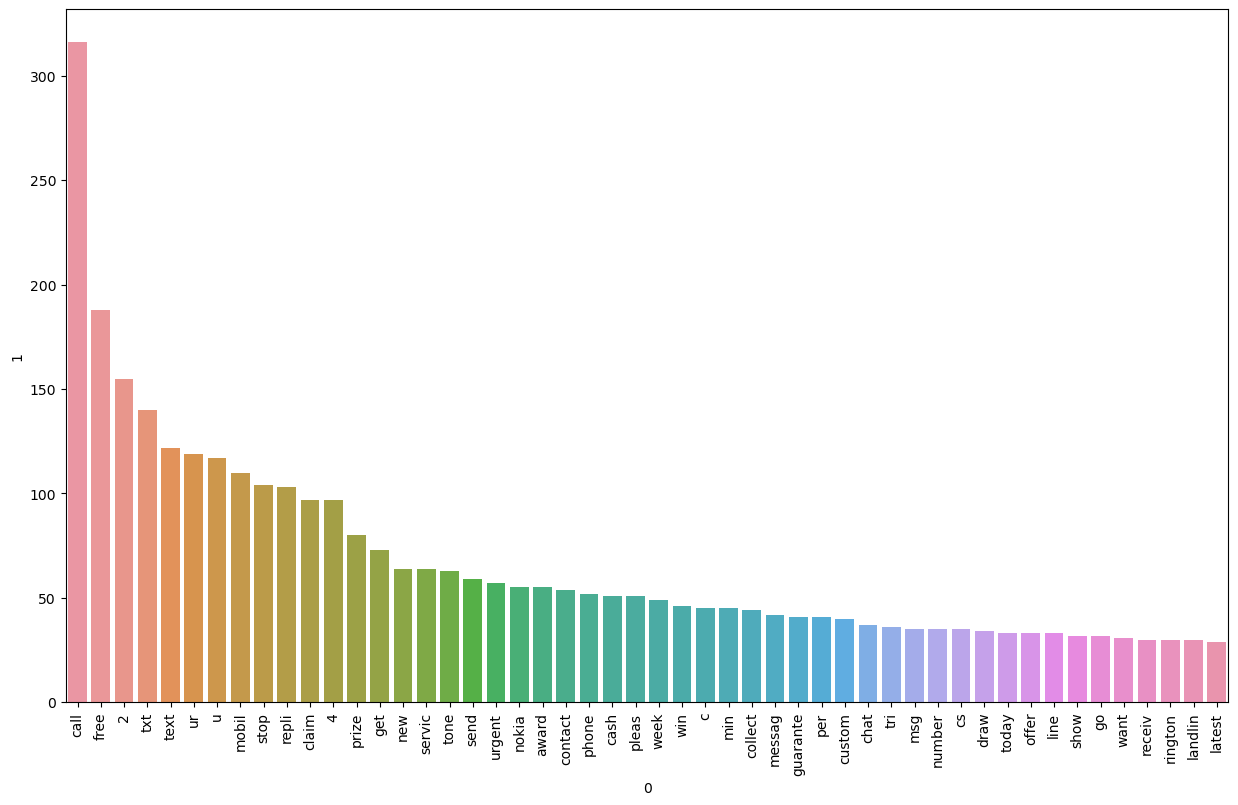

In [53]:
from collections import Counter
a = pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
b = pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(15,9))
sns.barplot(x=a,y=b)
plt.xticks(rotation='vertical')
plt.show()

In [54]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

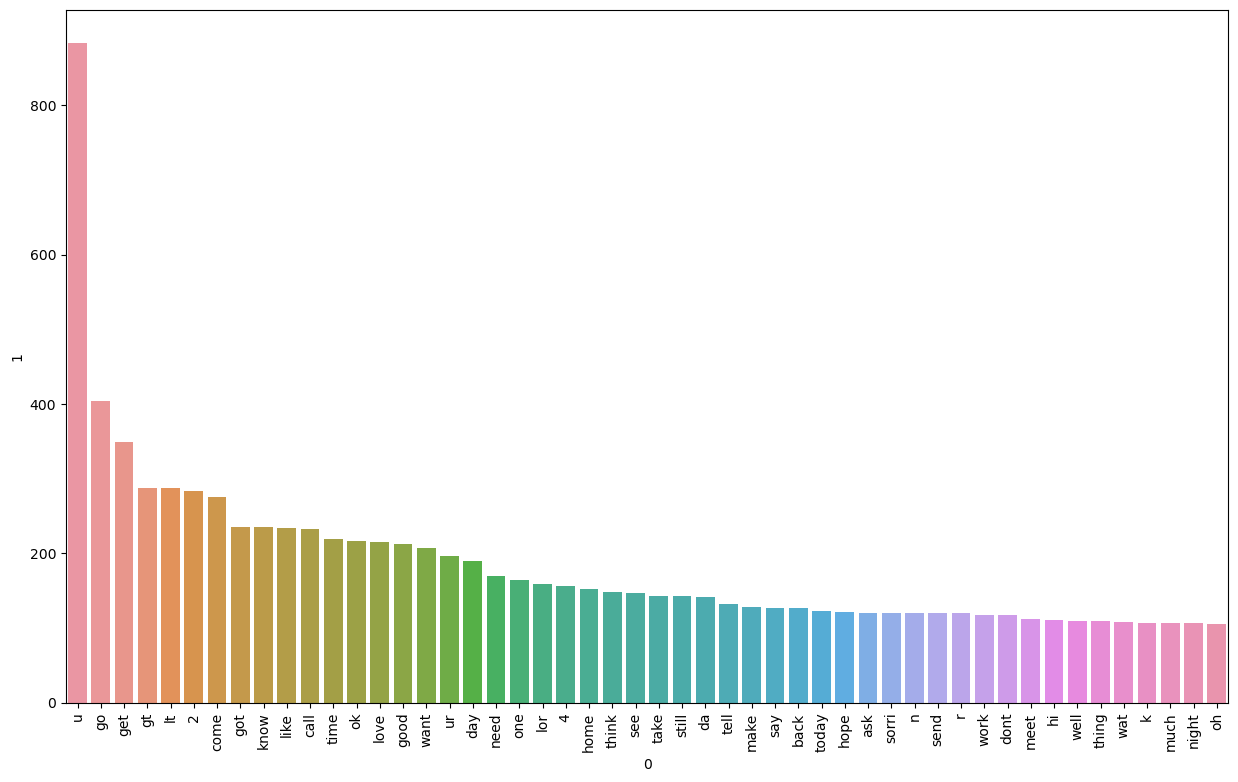

In [55]:
from collections import Counter
a = pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
b = pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
plt.figure(figsize=(15,9))
sns.barplot(x=a,y=b)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
len(ham_corpus)

35306

## 4. Model Building

#### text vectorization

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [89]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [90]:
X.shape

(5163, 6678)

In [91]:
y = df['target'].values

In [92]:
y.shape

(5163,)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [95]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [96]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [97]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8664085188770572
[[787 125]
 [ 13 108]]
0.463519313304721


In [98]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9757986447241046
[[899  13]
 [ 12 109]]
0.8934426229508197


In [99]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9690222652468539
[[908   4]
 [ 28  93]]
0.9587628865979382


#####  lets also see TfidfVectorizer

In [281]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5250)

In [282]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [283]:
X.shape

(5163, 5250)

In [284]:
y = df['target'].values

In [285]:
y.shape

(5163,)

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [288]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [289]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [290]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8635043562439496
[[786 126]
 [ 15 106]]
0.45689655172413796


In [291]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9641819941916747
[[912   0]
 [ 37  84]]
1.0


In [280]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748305905130688
[[909   3]
 [ 23  98]]
0.9702970297029703


#### so we will choose tfidf --> mnb, lets also check some other models

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [234]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [235]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'MNB': mnb,
    'BNB': bnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [236]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [237]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738625363020329
Precision -  0.9607843137254902
For  KN
Accuracy -  0.9090029041626331
Precision -  1.0
For  MNB
Accuracy -  0.9641819941916747
Precision -  1.0
For  BNB
Accuracy -  0.9748305905130688
Precision -  0.9702970297029703
For  DT
Accuracy -  0.9341723136495643
Precision -  0.8117647058823529
For  LR
Accuracy -  0.952565343659245
Precision -  0.9285714285714286
For  RF
Accuracy -  0.9690222652468539
Precision -  0.989010989010989
For  AdaBoost
Accuracy -  0.9564375605033882
Precision -  0.8958333333333334
For  BgC
Accuracy -  0.9612778315585673
Precision -  0.8584070796460177
For  ETC
Accuracy -  0.9757986447241046
Precision -  0.98
For  GBDT
Accuracy -  0.9506292352371732
Precision -  0.8977272727272727
For  xgb
Accuracy -  0.9651500484027106
Precision -  0.9207920792079208


In [238]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [239]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.909003,1.000000
2,MNB,0.964182,1.000000
6,RF,0.969022,0.989011
9,ETC,0.975799,0.980000
3,BNB,0.974831,0.970297
0,SVC,0.973863,0.960784
5,LR,0.952565,0.928571
11,xgb,0.965150,0.920792
10,GBDT,0.950629,0.897727
7,AdaBoost,0.956438,0.895833


In [240]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [241]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.909003
1,MNB,Accuracy,0.964182
2,RF,Accuracy,0.969022
3,ETC,Accuracy,0.975799
4,BNB,Accuracy,0.974831
5,SVC,Accuracy,0.973863
6,LR,Accuracy,0.952565
7,xgb,Accuracy,0.965150
8,GBDT,Accuracy,0.950629
9,AdaBoost,Accuracy,0.956438


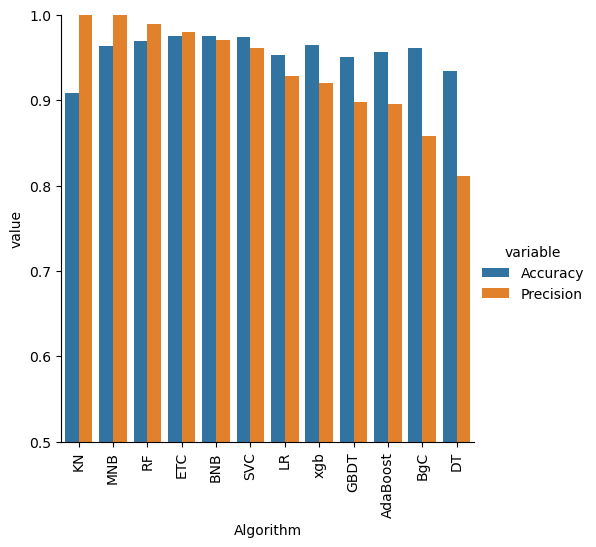

In [243]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

#### Changed the max_features parameter of TfIdf

In [244]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [245]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

#### scaling didn't improve performace (increased acciracy a little, reduced precision which is most important for our problem) hence, not integrating it 

#### model improve

In [255]:
performance_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_5250':accuracy_scores,'Precision_max_ft_5250':precision_scores}).sort_values('Precision_max_ft_5250',ascending=False)

In [256]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [257]:
new_df = performance_df1.merge(temp_df,on='Algorithm')

In [258]:
new_df_scaled = temp_df.merge(new_df,on='Algorithm')

In [259]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [260]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy_scaling_x,Precision_scaling_x,Accuracy_max_ft_5250,Precision_max_ft_5250,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.909003,1.000000,0.909003,1.000000,0.909003,1.000000,0.909003,1.000000
1,MNB,0.964182,1.000000,0.964182,1.000000,0.964182,1.000000,0.964182,1.000000
2,RF,0.969022,0.989011,0.969022,0.989011,0.969022,0.989011,0.969022,0.989011
3,ETC,0.975799,0.980000,0.975799,0.980000,0.975799,0.980000,0.975799,0.980000
4,BNB,0.974831,0.970297,0.974831,0.970297,0.974831,0.970297,0.974831,0.970297
5,SVC,0.973863,0.960784,0.973863,0.960784,0.973863,0.960784,0.973863,0.960784
6,LR,0.952565,0.928571,0.952565,0.928571,0.952565,0.928571,0.952565,0.928571
7,xgb,0.965150,0.920792,0.965150,0.920792,0.965150,0.920792,0.965150,0.920792
8,GBDT,0.950629,0.897727,0.950629,0.897727,0.950629,0.897727,0.950629,0.897727
9,AdaBoost,0.956438,0.895833,0.956438,0.895833,0.956438,0.895833,0.956438,0.895833


In [261]:
# checking Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [262]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [263]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [264]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806389157792836
Precision 0.9902912621359223


In [265]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [266]:
from sklearn.ensemble import StackingClassifier

In [267]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [268]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835430784123911
Precision 0.956140350877193


In [292]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))